In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver2D as s2

## Mesh creation

In [9]:
mesh = BoxMesh(Point(-1, -1, 0), Point(1, 1, 1), 20, 20, 20)
# mesh = UnitCubeMesh(10, 10, 10)
V = FunctionSpace(mesh,"P",1)

## Test Case


In [9]:
m0 = 1e-3
dt = 0.5
T = 150
save_interval = 10
times = [] #[0,7/dt,14/dt,21/dt,28/dt]
doses = [] #10*np.ones_like(times)  
V = FunctionSpace(mesh,"P",1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma) - x[0]*x[0]/(2*sigma_x*sigma_x) - x[1]*x[1]/(2*sigma_x*sigma_x))",
                m0 = m0,s0 = 0.5,sigma=sqrt(0.02),sigma_x = sqrt(0.008),degree=2)
# n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,sigma=sqrt(0.02),degree=2)
n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/V1.5e5_T150_ref20x20"

solver = s2.Solver2D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass,phi_vect = solver.solve()


time=0: 
Solving linear variational problem.
iter=1: norm=0.871627
Solving linear variational problem.
iter=2: norm=2.49962e-05
Solving linear variational problem.
time=0.5: 
Solving linear variational problem.
iter=1: norm=1.63053e-05
Solving linear variational problem.
time=1: 
Solving linear variational problem.
iter=1: norm=1.97863e-05
Solving linear variational problem.
time=1.5: 
Solving linear variational problem.
iter=1: norm=2.39003e-05
Solving linear variational problem.
time=2: 
Solving linear variational problem.
iter=1: norm=2.87305e-05
Solving linear variational problem.
time=2.5: 
Solving linear variational problem.
iter=1: norm=3.43675e-05
Solving linear variational problem.
time=3: 
Solving linear variational problem.
iter=1: norm=4.09077e-05
Solving linear variational problem.
time=3.5: 
Solving linear variational problem.
iter=1: norm=4.84523e-05
Solving linear variational problem.
time=4: 
Solving linear variational problem.
iter=1: norm=5.71071e-05
Solving linear v

0.4494892227236305


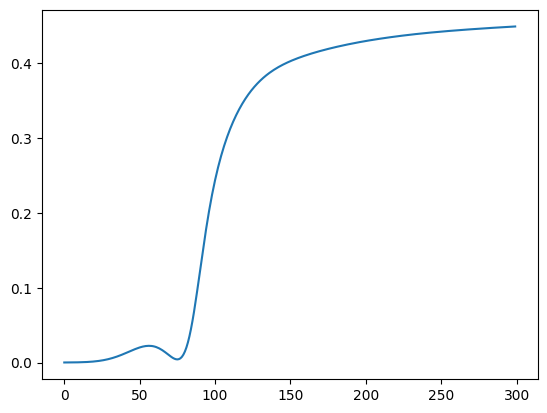

In [8]:
path_sol = "solutions/V3e5_T250_ref20x10"
mass = np.load(path_sol + '/mass.npy')
plt.plot(mass)
print(mass[-1])
# plt.xlim([400,500])
# mass2 = np.load("solutions/V2*1e5_sigma01/mass.npy")
# plt.plot(mass2)
# path_sol2 = "solutions/prova_T100"
# mass2 = np.load(path_sol2 + '/mass.npy')
# plt.plot(mass2)

# plt.xlim([0,40])

0.4541521864204986
0.45407829801780525
0.4539246946478151
0.45364039469691164
0.4531406634113185
0.4522949526948939
0.4509077039186566
0.4486978553286284
0.44527781912681375
0.44020743707419185
0.43305467788398855
0.42360663484332983
0.4120869682730138
0.39923428222863755
0.3860554739086485
0.3736458183322629
0.3626574804199912
0.3534098249723487
0.3459358755925725
0.3401466987158914
0.335696088932323
0.3324141005181427
0.330059093444998
0.3284538930254422
0.32731753594839647
0.3265122300051495
0.32592297212645455
0.32541826447610434
0.32488114378034005
0.3242054726895732


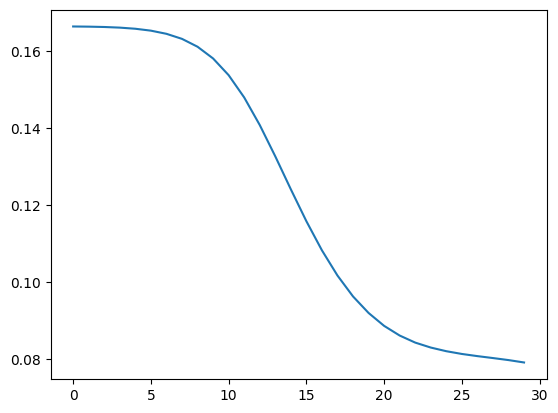

In [5]:
# oxygen level test case 1
c = Function(V)
cfile = XDMFFile(path_sol + '/c.xdmf')
ctot = []
for i in range(30):
    cfile.read_checkpoint(c,"c",i)
    print(c.vector().max())
    ctot.append(assemble(c*dx))
plt.plot(ctot)

0.969508841877184 0.021161783094947036 0.0003027070638990248


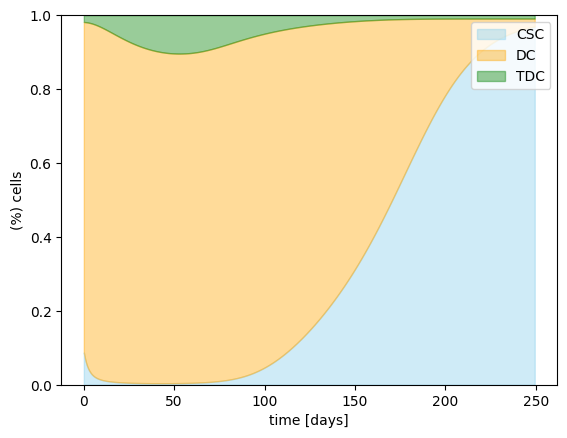

In [7]:
csc = np.load(path_sol + '/csc_mass.npy')
dc = np.load(path_sol + '/dc_mass.npy')
tdc = np.load(path_sol + '/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
time=np.arange(0,250,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
#plt.xlim([0,150])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])
print(csc[-1],dc[-1],tdc[-1])

## Comparison

In [17]:
path_sol1 = "../Model3D/solutions/t400_masses"
mesh2 = IntervalMesh(20,0,1)
V2 = FunctionSpace(mesh2,"P",1)
c = Function(V2)
cfile = XDMFFile(path_sol1 + '/c.xdmf')
c1 = []
for i in range(50,200,2):
    cfile.read_checkpoint(c,"c",i)
    c1. append(c.vector().min())
    # ctot.append(assemble(c*dx))

In [18]:
path_sol2 = "../Model1D/solutions/B_Km0.005"
mesh2 = UnitSquareMesh(20,20)
V2 = FunctionSpace(mesh2,"P",2)
c = Function(V2)
cfile = XDMFFile(path_sol2 + '/c.xdmf')
c2 = []
for i in range(25,100):
    cfile.read_checkpoint(c,"c",i)
    c2.append(c.vector().min())

In [16]:
cdiff = np.array(c1)-np.array(c2)
print(np.mean(cdiff),np.std(cdiff))

0.05652293498010914 0.0228555671849544


0.06452651687726337 0.020778162278811876


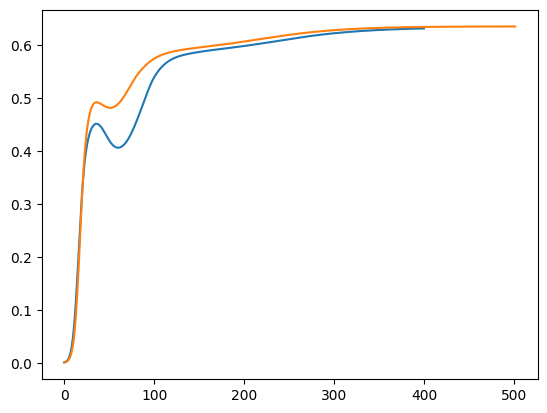

In [29]:
mass1 = np.load(path_sol1 + '/mass.npy')
time1 = np.arange(0,400,0.5)
mass2 = np.load(path_sol2 + '/mass.npy')
time2 = np.arange(0,501,0.1)
plt.plot(time1,mass1)
plt.plot(time2,mass2)
# print(mass1[50:200])
x = np.arange(250,1000,5)
print(np.mean(mass2[x] - mass1[50:200]),np.std(mass2[x] - mass1[50:200]))
